In [5]:
import csv
import pandas
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
import matplotlib
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition

users = pandas.read_csv("data/users.csv", header=None)
conversions = pandas.read_csv("data/conversions.csv", header=None)
items = pandas.read_csv("data/items.csv", header=None)
users_ads = pandas.read_csv("data/users_ads.csv", header=None)
views = pandas.read_csv("data/views.csv", header=None, low_memory=False)

Renaming dataframes columns for comfy reading

In [6]:
users.columns = ['userId', 'registerCountry', 'signupTime']
conversions.columns = ['userId', 'itemId', 'price', 'quantity', 'timestamp']
items.columns = ['itemId', 'style', 'personality', 'color', 'theme', 'price', 'category']
users_ads.columns = ['userId', 'utmSource', 'utmCampaign', 'utmMedium', 'utmTerm', 'utmContent']
views.columns = ['userId', 'itemId', 'timestamp', 'pagetype']

In [7]:
users.signupTime = pandas.to_datetime(users.signupTime)
conversions.timestamp = pandas.to_datetime(conversions.timestamp)
views.timestamp = pandas.to_datetime(views.timestamp)

I only am doing it to make the work on the charts a bit faster: choosing only 20% of each dataset.

In [8]:
import random
def random_subset(df, percent):
    new_size  = int(percent*len(df.index))
    subset = random.sample(set(df.index), new_size)
    return df.ix[subset]

users_small = random_subset(users, 0.2)
items_small = random_subset(items, 0.2)
users_ads_small = random_subset(users_ads, 0.2)
conversions_small = random_subset(conversions, 0.2)
# views_small = random_subset(views, 0.2)

A simple plot showing how many people (participating in any conversion) bought particular number of items.

In [9]:
# for each user, how many items he purchased
counts = conversions.userId.value_counts()
# for each count of purchases/client, how many is them?
# so: how many clients purchased k items
counts2 = counts.value_counts()
counts2 = counts2.sort_index()
# tmp = pandas.Series(counts.index, index=counts.values)
counts2.plot()
plt.show()

/usr/local/lib/python3.4/dist-packages/matplotlib/backends/backend_gtk3.py:215: Warning: Source ID 7 was not found when attempting to remove it
  GLib.source_remove(self._idle_event_id)


Plot saying when users registered.

In [10]:
df_per_month = users.signupTime.value_counts()
df_per_month = df_per_month.sort_index()
f, ax = sns.plt.subplots(1, sharex=False, sharey=False)
ax.set_title("User registrations in time", fontsize=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
df_per_month.plot(x=range(1,13), ax=ax)
plt.show()

/usr/local/lib/python3.4/dist-packages/matplotlib/backends/backend_gtk3.py:215: Warning: Source ID 331 was not found when attempting to remove it
  GLib.source_remove(self._idle_event_id)


Evolve timestamp to year, month, day and hour.

In [11]:
def add_year_to_hr(df, timename):
    df['month'] = pandas.DatetimeIndex(df[timename]).month
    df['year'] = pandas.DatetimeIndex(df[timename]).year
    df['day'] = pandas.DatetimeIndex(df[timename]).day
    df['hour'] = pandas.DatetimeIndex(df[timename]).hour
    return df

How much ppl spend each hour?

In [12]:
conversions = add_year_to_hr(conversions, "timestamp")
users = add_year_to_hr(users, "signupTime")

In [13]:
sum_per_hour = []
for i in range(0,24):
    sum_per_hour.append(conversions[conversions.hour == i].price.sum())

f, ax = sns.plt.subplots(1, sharex=False, sharey=False)
ax.set_title("Conversions distribution during the day", fontsize=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
pandas.Series(sum_per_hour).plot(ax=ax)
plt.show()

/usr/local/lib/python3.4/dist-packages/matplotlib/backends/backend_gtk3.py:215: Warning: Source ID 427 was not found when attempting to remove it
  GLib.source_remove(self._idle_event_id)


and each day of the month

In [14]:
sum_per_day = []
for i in range(1,32):
    sum_per_day.append(conversions[conversions.day == i].price.sum())

f, ax = sns.plt.subplots(1, sharex=False, sharey=False)
ax.set_title("Conversions distribution during the days of the month", fontsize=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
pandas.Series(sum_per_day).plot(ax=ax)
plt.show()

/usr/local/lib/python3.4/dist-packages/matplotlib/backends/backend_gtk3.py:215: Warning: Source ID 545 was not found when attempting to remove it
  GLib.source_remove(self._idle_event_id)


How many users registered each month?

In [15]:
users_per_month = users.month.value_counts()
users_per_month = users_per_month.sort_index()
f, ax = sns.plt.subplots(1, sharex=False, sharey=False)
ax.set_title("Mow many users registered each month?", fontsize=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 

users_per_month.plot(x=range(1,13), ax=ax)

plt.show()

/usr/local/lib/python3.4/dist-packages/matplotlib/backends/backend_gtk3.py:215: Warning: Source ID 574 was not found when attempting to remove it
  GLib.source_remove(self._idle_event_id)


What time do users usually register?

In [16]:
f, ax = sns.plt.subplots(1, sharex=False, sharey=False)
ax.set_title("Hours of registration", fontsize=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 

sum_per_hour = []
    
for i in range(0,24):
    sum_per_hour.append(users[users.hour == i].hour.size)

pandas.Series(sum_per_hour).plot()
plt.show()

/usr/local/lib/python3.4/dist-packages/matplotlib/backends/backend_gtk3.py:215: Warning: Source ID 605 was not found when attempting to remove it
  GLib.source_remove(self._idle_event_id)


Fist attempt to perform PCA (analysis of items price, cathegory and color split by theme). It is not working correctly yet, did not manage to fix it.

In [17]:
X = np.array([items_small.price.values,
              items_small.category.values,
              items_small.color.values])

y = np.array([items_small.theme.values])

fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

# y = np.choose(y, [1, 2]).astype(np.float)
ax.scatter(X[0], X[1], X[2], c=[1,2], cmap=plt.cm.spectral)

x_surf = [X[:, 0].min(), X[:, 0].max(),
          X[:, 0].min(), X[:, 0].max()]
y_surf = [X[:, 0].max(), X[:, 0].max(),
          X[:, 0].min(), X[:, 0].min()]
x_surf = np.array(x_surf)
y_surf = np.array(y_surf)
v0 = pca.transform(pca.components_[[0]])
v0 /= v0[-1]
v1 = pca.transform(pca.components_[[1]])
v1 /= v1[-1]

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

/usr/local/lib/python3.4/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
/usr/local/lib/python3.4/dist-packages/matplotlib/backends/backend_gtk3.py:215: Warning: Source ID 688 was not found when attempting to remove it
  GLib.source_remove(self._idle_event_id)


Merging dataframes - creating a frame containing full information about transactions (with redundancies, so cannot be applied to views, as it is too big). Will be useful for a single customer journey visualization I am working on now.

In [18]:
full_info_conversions = conversions.merge(users, how='inner', on='userId')
full_info_conversions = full_info_conversions.merge(items, how='inner', on='itemId')
print(full_info_conversions.columns.values)

['userId' 'itemId' 'price_x' 'quantity' 'timestamp' 'month_x' 'year_x'
 'day_x' 'hour_x' 'registerCountry' 'signupTime' 'month_y' 'year_y' 'day_y'
 'hour_y' 'style' 'personality' 'color' 'theme' 'price_y' 'category']


A single customer journey.

Printing plots connected with user's activity: for now buying and views.

In [250]:
import calendar
def single_customer_journey(myId):
    user_full_info_conversions = full_info_conversions[full_info_conversions.userId==myId]
    %matplotlib inline
    sns.set()
    main_title = "Showing journey for customer " + str(myId) + " registered in " + user_full_info_conversions.registerCountry[user_full_info_conversions.index.values[0]];
    f, (ax1, ax2, ax3, ax4) = sns.plt.subplots(4, sharex=False, sharey=False)
    f.suptitle(main_title, fontsize=20)
    f.set_size_inches(15,30)
    f.tight_layout(pad=1, w_pad=1, h_pad=13)
    plt.subplots_adjust(top=0.95)
    
    df_per_month = user_full_info_conversions.timestamp.value_counts()
    df_per_month = df_per_month.sort_index()
    sns.barplot(y=df_per_month.values, x=df_per_month.index, ax=ax1)
    ax1.set_xticklabels(df_per_month.index, rotation=70)
    ax1.set_title("When did this user buy how many stuff?")
    ax1.set_xlabel("time", fontsize=13)
    ax1.set_ylabel("amount", fontsize=13)

    spending = user_full_info_conversions.price_y * user_full_info_conversions.quantity
    spending.index = user_full_info_conversions.timestamp
    spending = spending.sort_index()
    sns.barplot(y=spending.values, x=spending.index, ax=ax2)
    ax2.set_xticklabels(spending.index, rotation=70)
    ax2.set_title("How much did the user spend in time?")
    ax2.set_xlabel("time", fontsize=13)
    ax2.set_ylabel("amount", fontsize=13)
    
    views_of_user = views[views.userId==myId]
    df_per_month = views_of_user.timestamp.value_counts()
    df_per_month = df_per_month.sort_index()
    sns.barplot(y=df_per_month.values, x=df_per_month.index, ax=ax3)
    ax3.set_xticklabels(df_per_month.index, rotation=70)
    ax3.set_title("How many objects did the user check out?")
    ax3.set_xlabel("time", fontsize=13)
    ax3.set_ylabel("amount", fontsize=13)
    
#     user_full_info_conversions['spending'] = user_full_info_conversions.price_y * user_full_info_conversions.quantity
#     small = user_full_info_conversions.pivot('spending', 'year_x', 'month_x')
#     sns.heatmap(small, ax=ax4)
    
    sns.plt.show()

Showing Journey for a customer with a lot of transactions.

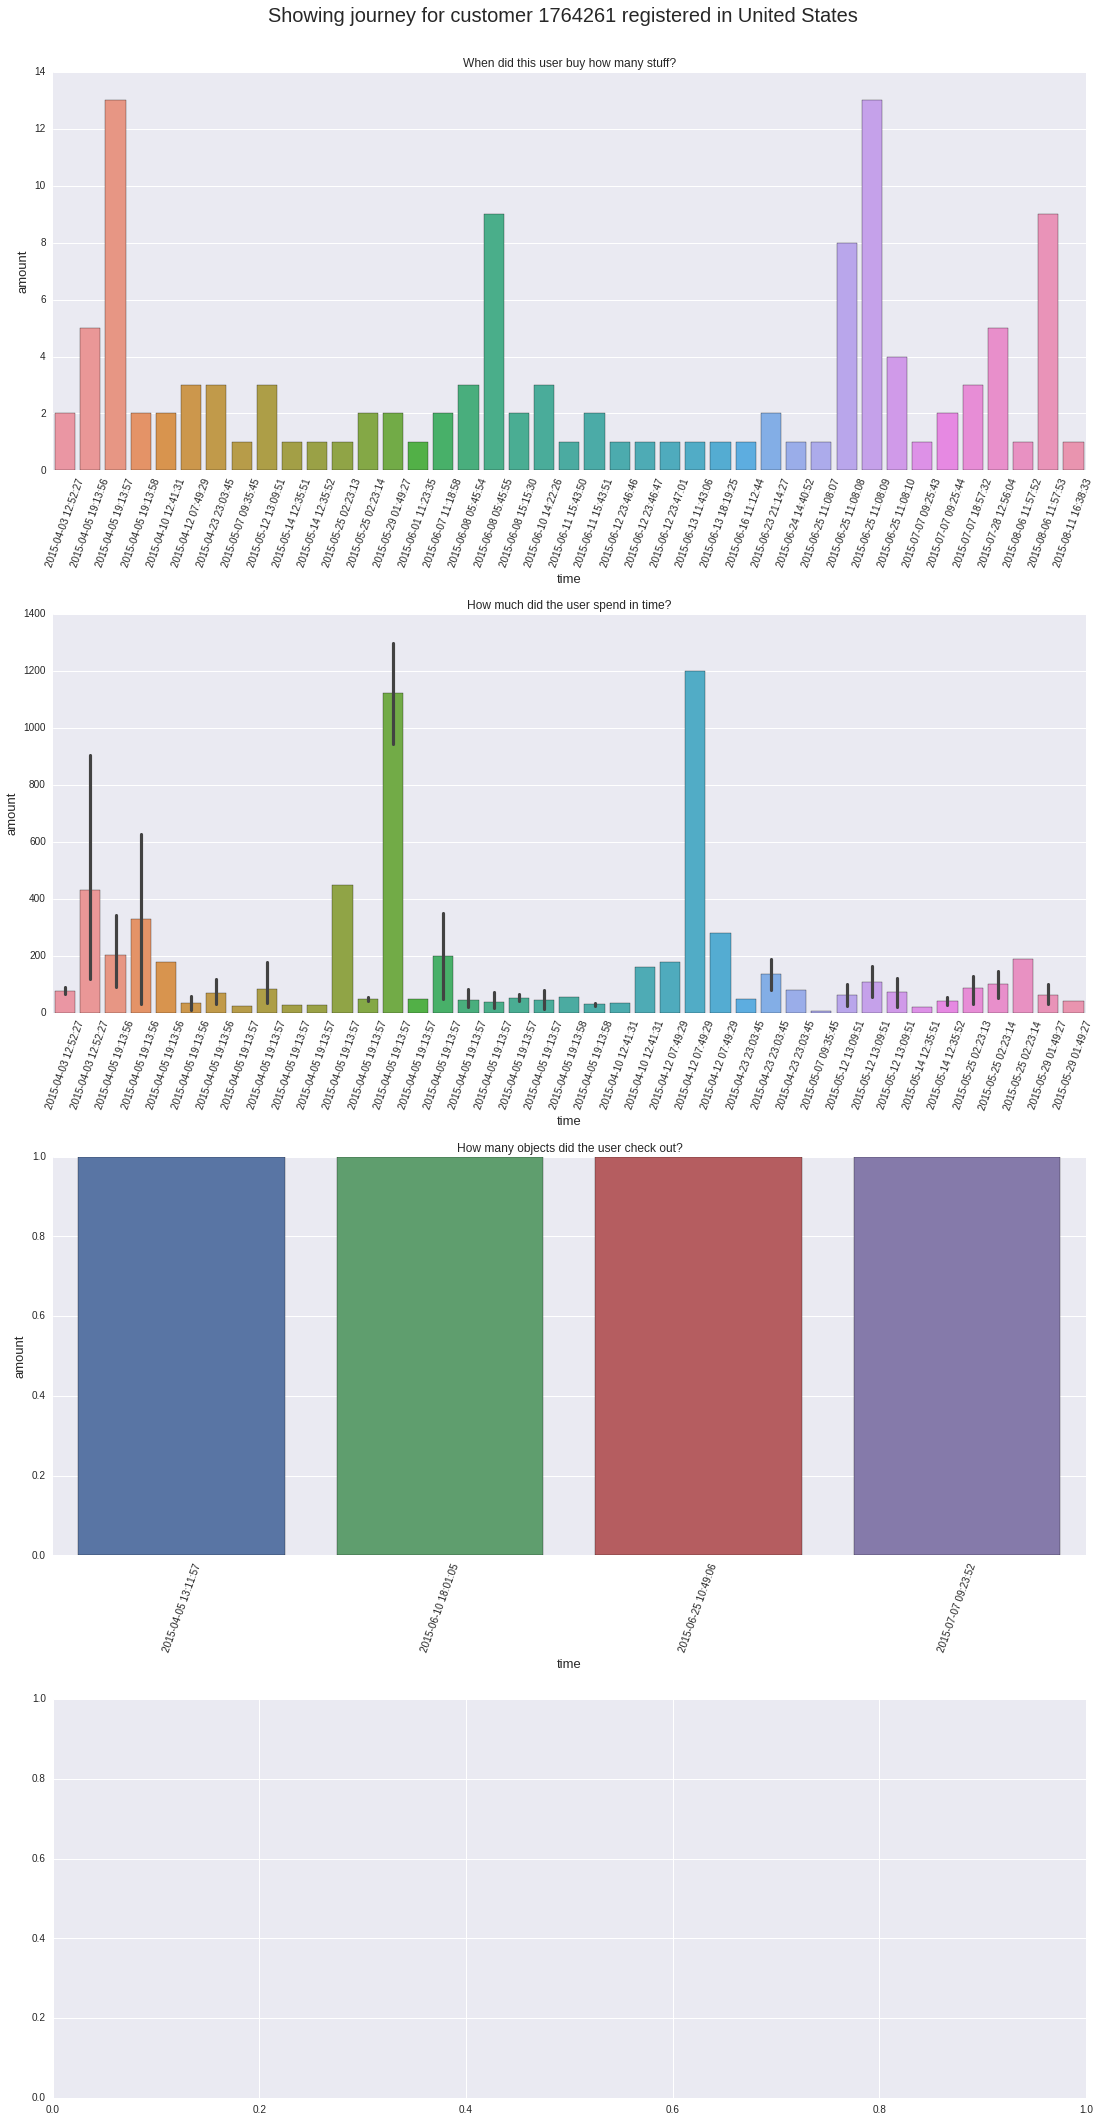

In [251]:
frequent_buyer = full_info_conversions.userId.value_counts().idxmax()
single_customer_journey(frequent_buyer)

In [227]:
print(pandas.Series.dt.month)